## Measurement Visualization

### Imports & Initializations 

In [32]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [33]:
trial_type = "solo"
confidence_threshold = 0.8
sensor_data = {}
tlx_data = {}

# Load data
data_path = os.path.join("data", f"{trial_type}", "measurements")
for file in os.listdir(data_path):
    if file.endswith("sensors.csv"):
        participant_id = file.split("_")[1]
        measurements = pd.read_csv(os.path.join(data_path, file))
        measurements = measurements[measurements[f"confidence_{participant_id}"] > confidence_threshold]
        sensor_data[participant_id] = measurements
    elif file.endswith("tlx.csv"):
        participant_id = file.split("_")[1]
        TLX_results = pd.read_csv(os.path.join(data_path, file))
        tlx_data[participant_id] = TLX_results['---NASA TLX V1.0.3 SINGLE TRIAL RATING SCALE ANSWERS---']


### Eye-tacking Data

In [34]:
pupil_capture_labels = [
    "confidence",
    "norm_pos_x",
    "norm_pos_y",
    "gaze_point_3d_x",
    "gaze_point_3d_y",
    "gaze_point_3d_z",
    "eye_center0_3d_x",
    "eye_center0_3d_y",
    "eye_center0_3d_z",
    "eye_center1_3d_x",
    "eye_center1_3d_y",
    "eye_center1_3d_z",
    "gaze_normal0_x",
    "gaze_normal0_y",
    "gaze_normal0_z",
    "gaze_normal1_x",
    "gaze_normal1_y",
    "gaze_normal1_z",
    "diameter0_2d",
    "diameter1_2d",
    "diameter0_3d",
    "diameter1_3d",
]


def plot_gaze_data(sensor_data, participant_id):
    data = sensor_data[participant_id]
    plt.figure(figsize=(10, 6))
    plt.scatter(data[f'norm_pos_x_{participant_id}'], data[f'norm_pos_y_{participant_id}'], alpha=0.5, marker='.')
    plt.title(f'Gaze Positions for Participant {participant_id}')
    plt.xlabel('Normalized Position X')
    plt.ylabel('Normalized Position Y')
    plt.grid(True)
    plt.show()

def plot_eye_diameter(sensor_data, participant_id, window_size=100):
    data = sensor_data[participant_id]
    smoothed_diameter0 = data[f'diameter0_3d_{participant_id}'].rolling(window=window_size, min_periods=1).mean()
    smoothed_diameter1 = data[f'diameter1_3d_{participant_id}'].rolling(window=window_size, min_periods=1).mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['timestamp'], smoothed_diameter0, label='Left Eye (Smoothed)')
    plt.plot(data['timestamp'], smoothed_diameter1, label='Right Eye (Smoothed)', alpha=0.7)
    plt.title(f'Smoothed Eye Diameter Over Time for Participant {participant_id}')
    plt.xlabel('Timestamp')
    plt.ylabel('Diameter (3D)')
    plt.legend()
    plt.show()


#### Raw

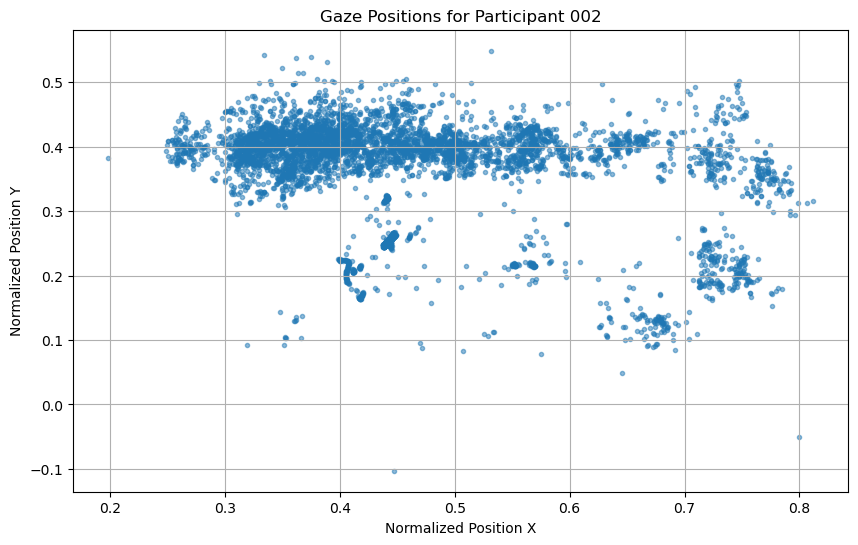

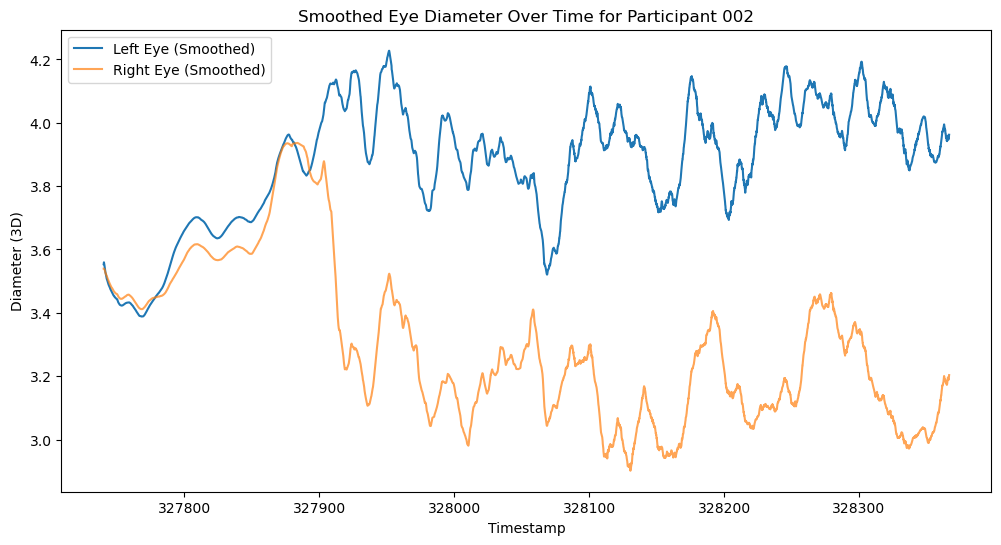

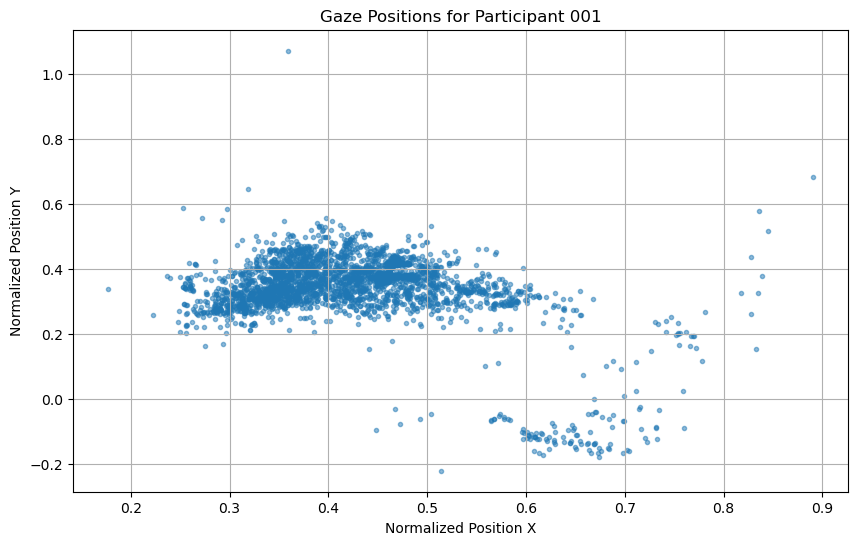

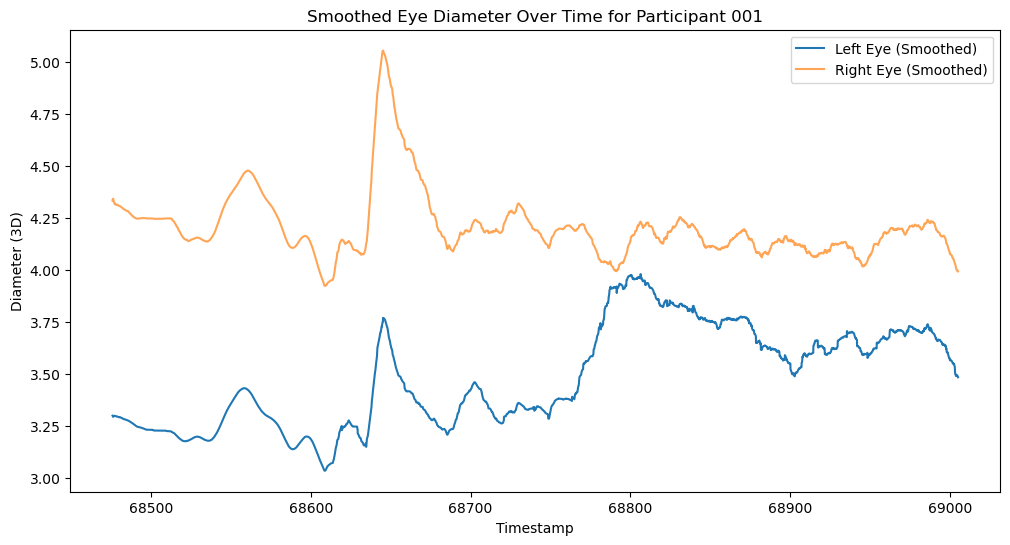

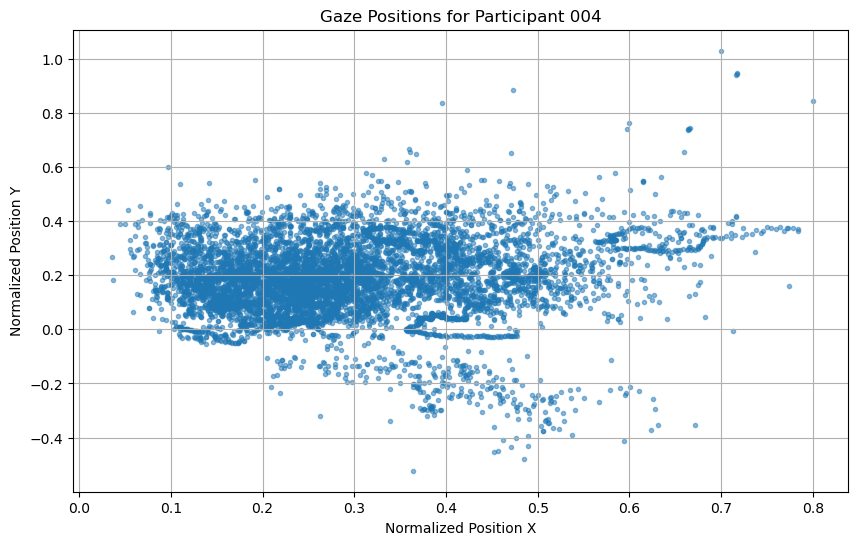

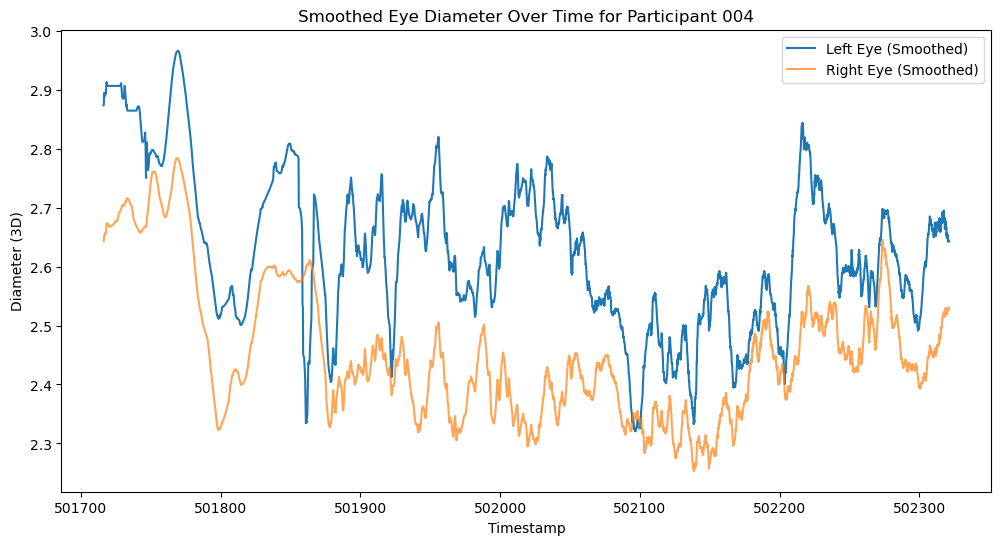

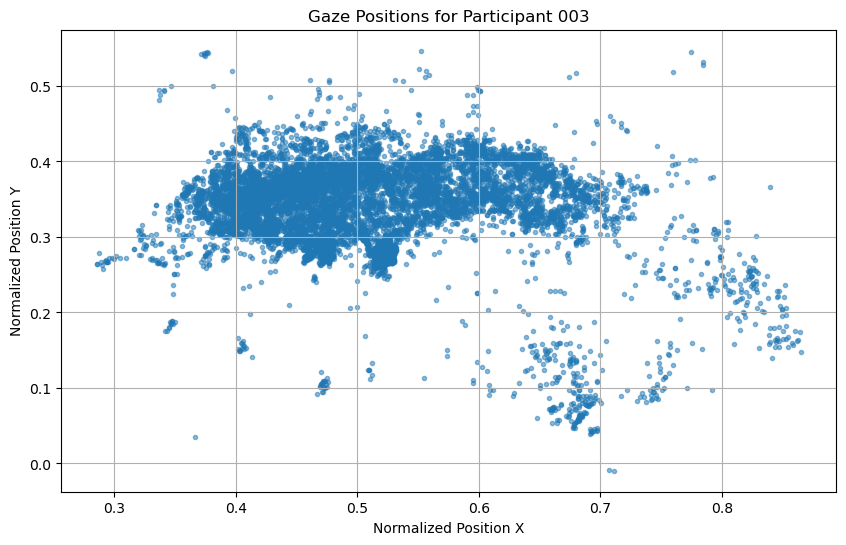

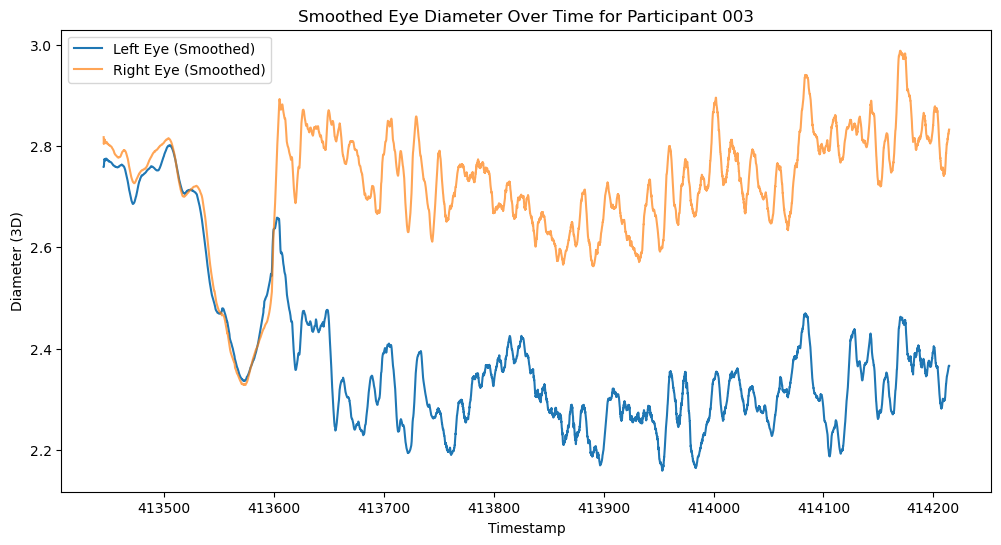

In [35]:
for participant_id in sensor_data.keys():
    plot_gaze_data(sensor_data, participant_id)
    plot_eye_diameter(sensor_data, participant_id)

#### Normalized

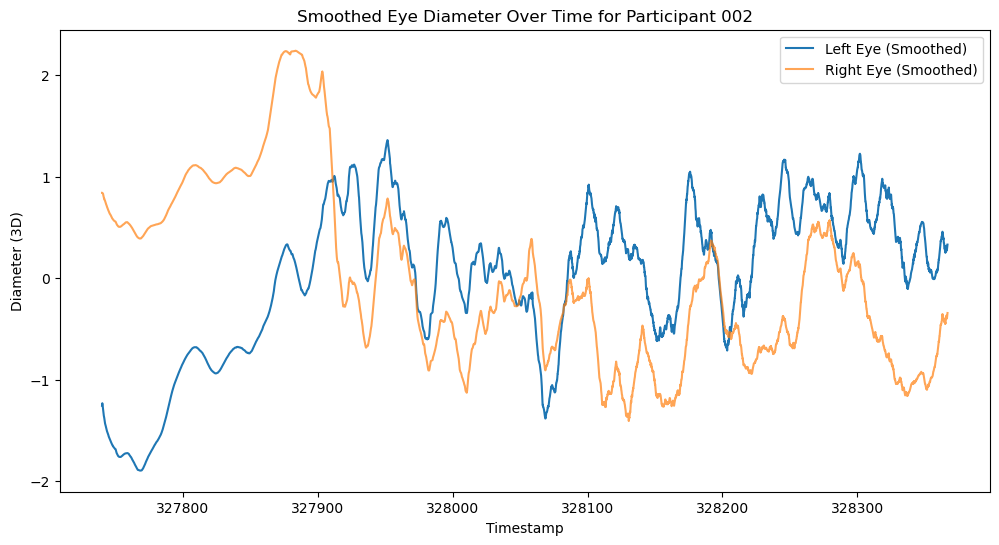

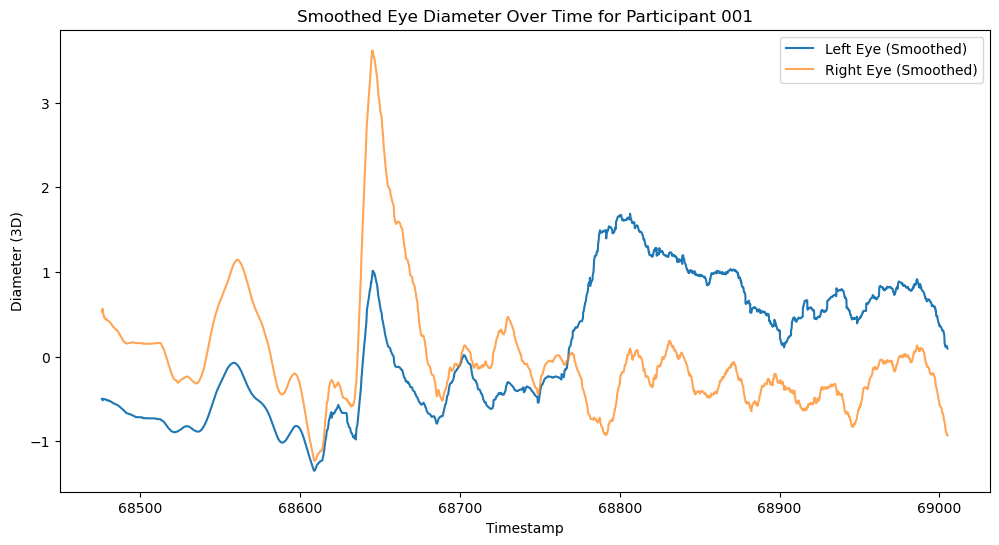

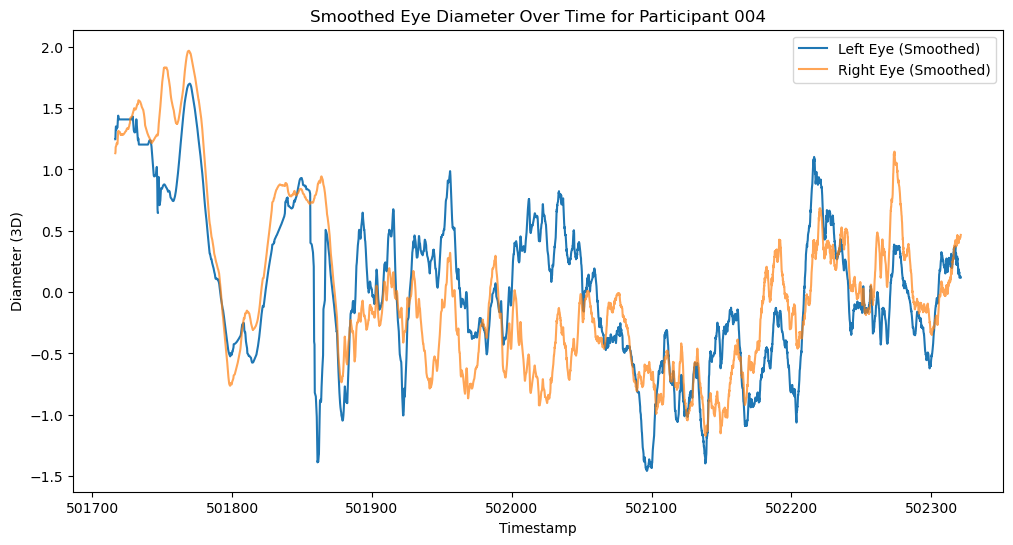

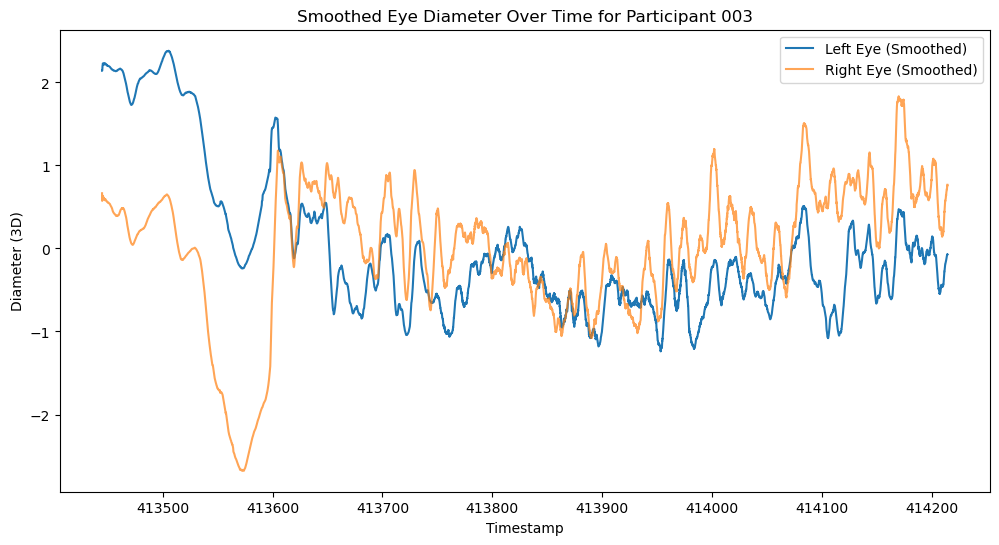

In [36]:
def normalize_data(data, labels):
    normalized_data = data.copy()
    for label in labels:
        column_name = f'{label}_{participant_id}'
        if column_name in data.columns:
            mean = data[column_name].mean()
            std = data[column_name].std()
            normalized_data[column_name] = (data[column_name] - mean) / std
    return normalized_data

normalized_sensor_data = {}
for participant_id in sensor_data.keys():
    normalized_sensor_data[participant_id] = normalize_data(sensor_data[participant_id], ["diameter0_3d", "diameter1_3d"])

# Plot the normalized gaze data
for participant_id in normalized_sensor_data.keys():
    plot_eye_diameter(normalized_sensor_data, participant_id)


### GSR Data

In [37]:
GSR_labels = [
    "Timestamp RAW (no units)",
    "Timestamp CAL (mSecs)",
    "System Timestamp CAL (mSecs)",
    "Wide Range Accelerometer X RAW (no units)",
    "Wide Range Accelerometer X CAL (m/(sec ^2))",
    "Wide Range Accelerometer Y RAW (no units)",
    "Wide Range Accelerometer Y CAL (m/(sec ^2))",
    "Wide Range Accelerometer Z RAW (no units)",
    "Wide Range Accelerometer Z CAL (m/(sec ^2))",
    "VSenseBatt RAW (no units)",
    "VSenseBatt CAL (m Volts)",
    "Internal ADC A13 RAW (no units)",
    "Internal ADC A13 CAL (m Volts)",
    "GSR RAW (no units)",
    "GSR CAL (kOhms)",
    "GSR Conductance CAL (u Siemens)",
]

def plot_gsr_data(sensor_data, participant_id, variable="GSR CAL (kOhms)", window_size=100):
    if participant_id not in sensor_data:
        print(f"No data for participant {participant_id}")
        return
    data = sensor_data[participant_id]
    data[f'{variable}_{participant_id}'] = data[f'{variable}_{participant_id}'].rolling(window=window_size, min_periods=1).mean()

    plt.figure(figsize=(15, 7))
    plt.plot(data['timestamp'], data[f'{variable}_{participant_id}'], label=variable, color='blue', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel(variable)
    plt.title(f'{variable} over Time for Participant {participant_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Raw

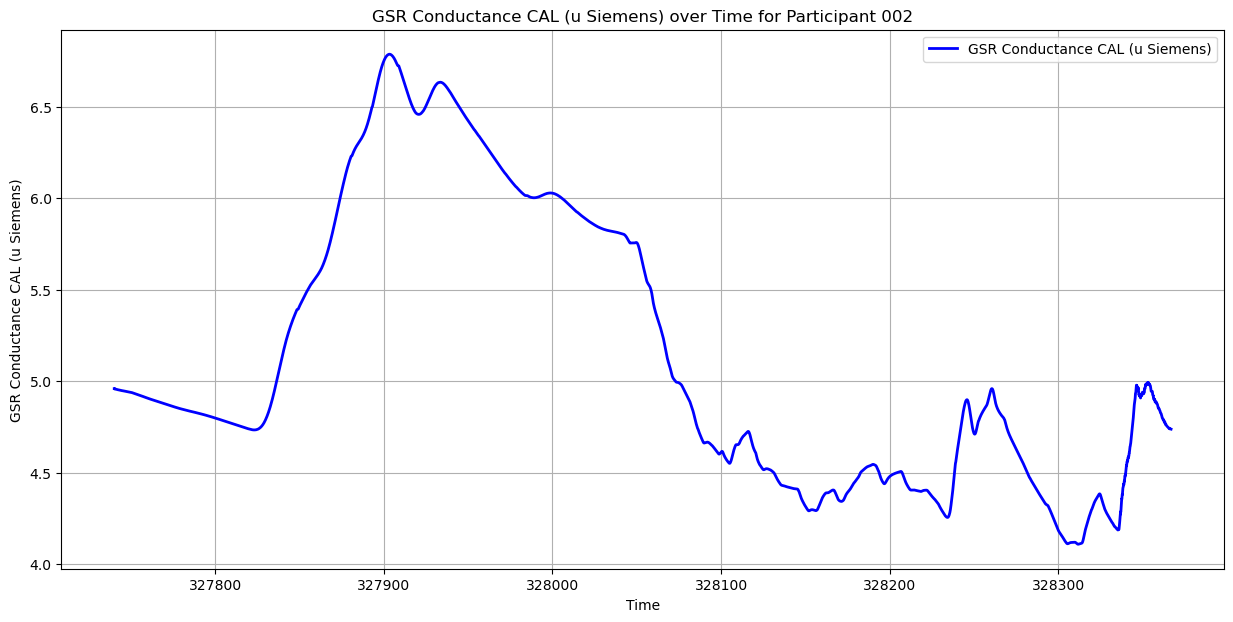

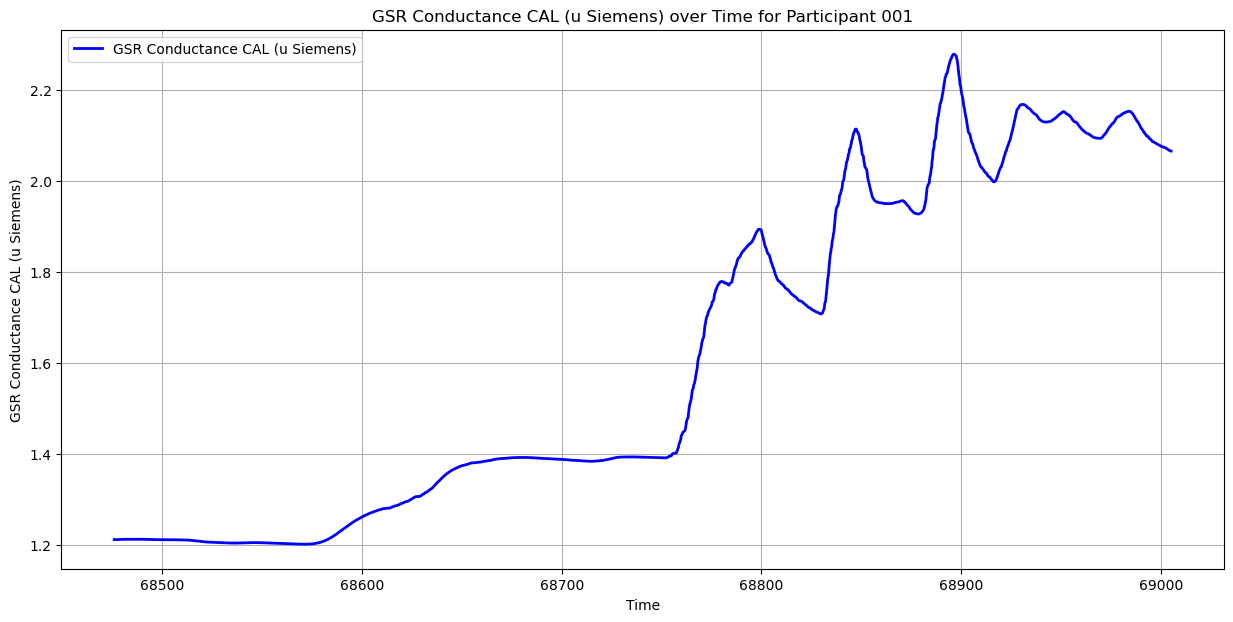

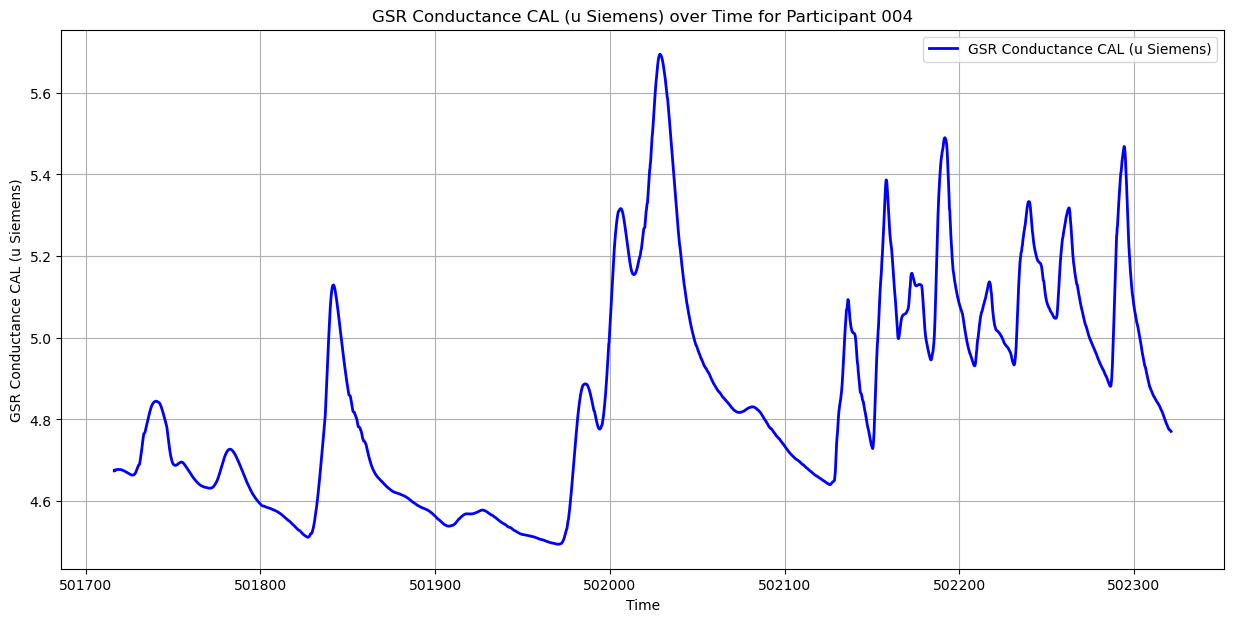

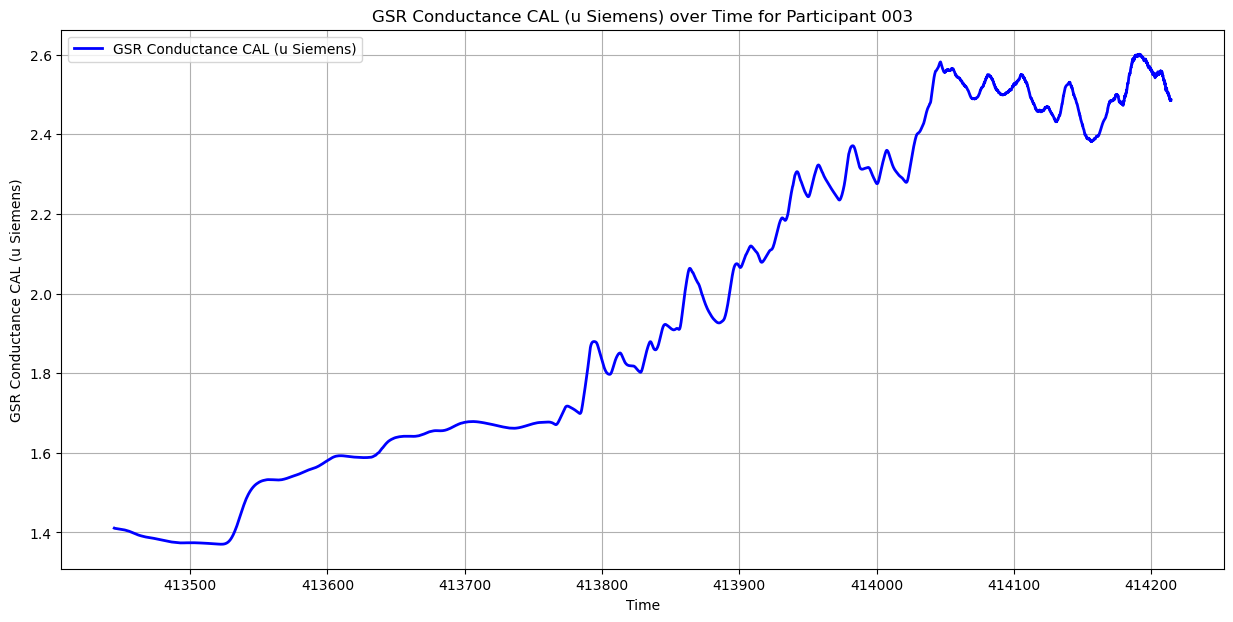

In [38]:
for participant_id in sensor_data.keys():
    plot_gsr_data(sensor_data, participant_id, variable=GSR_labels[-1], window_size=100)

#### Normalized

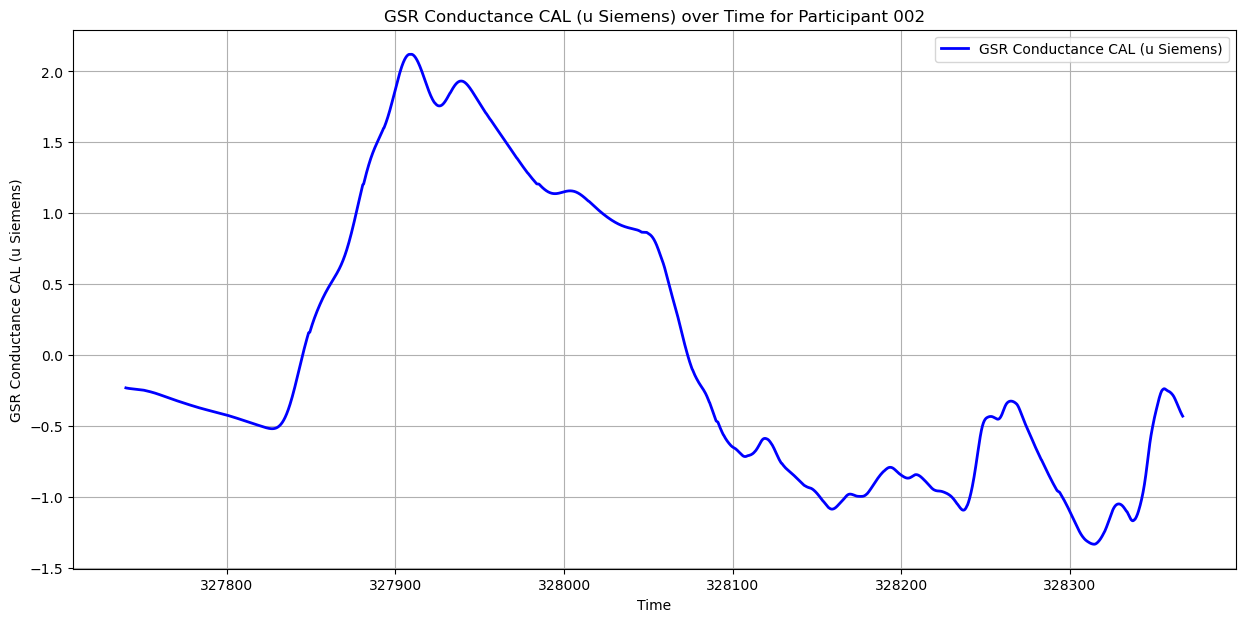

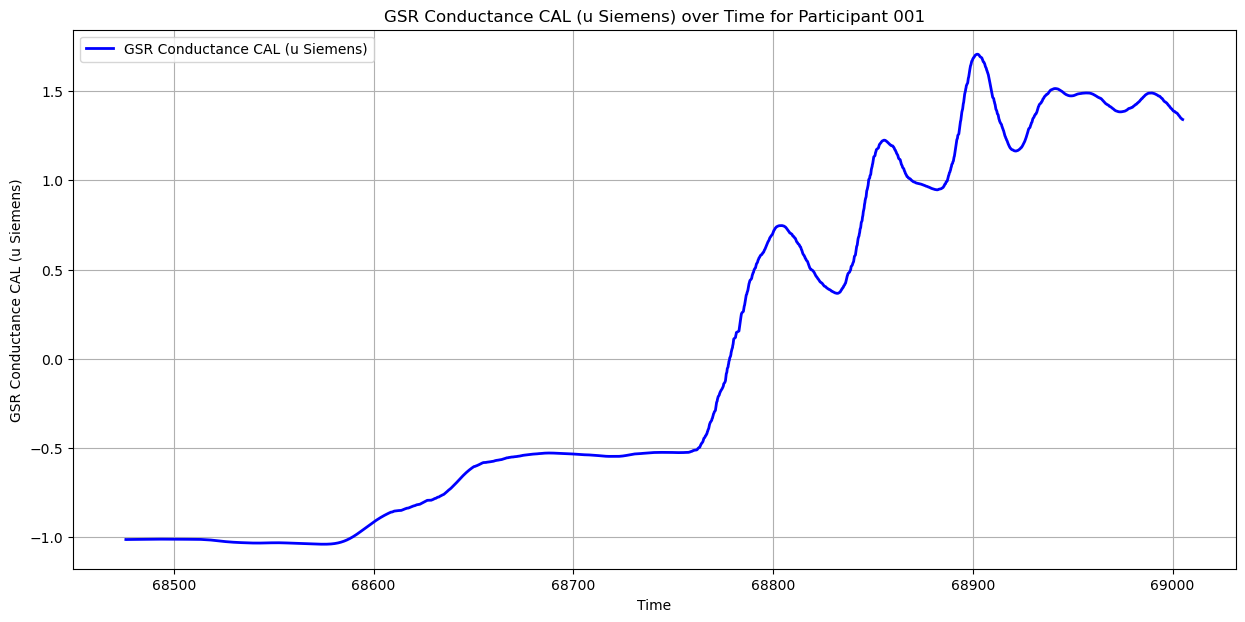

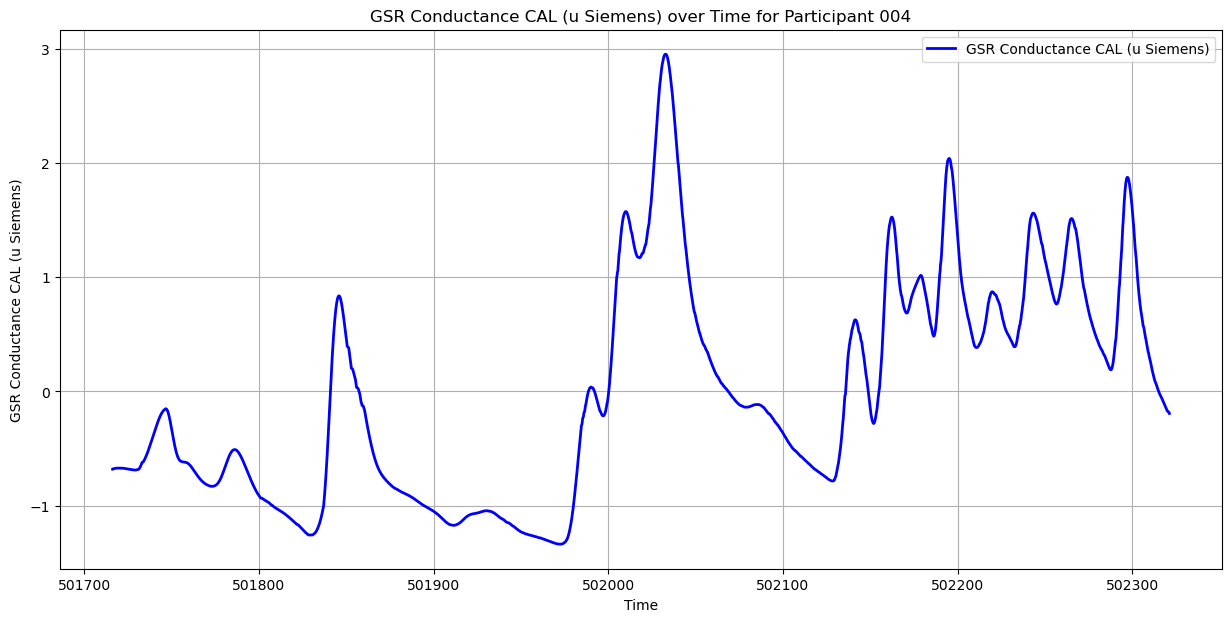

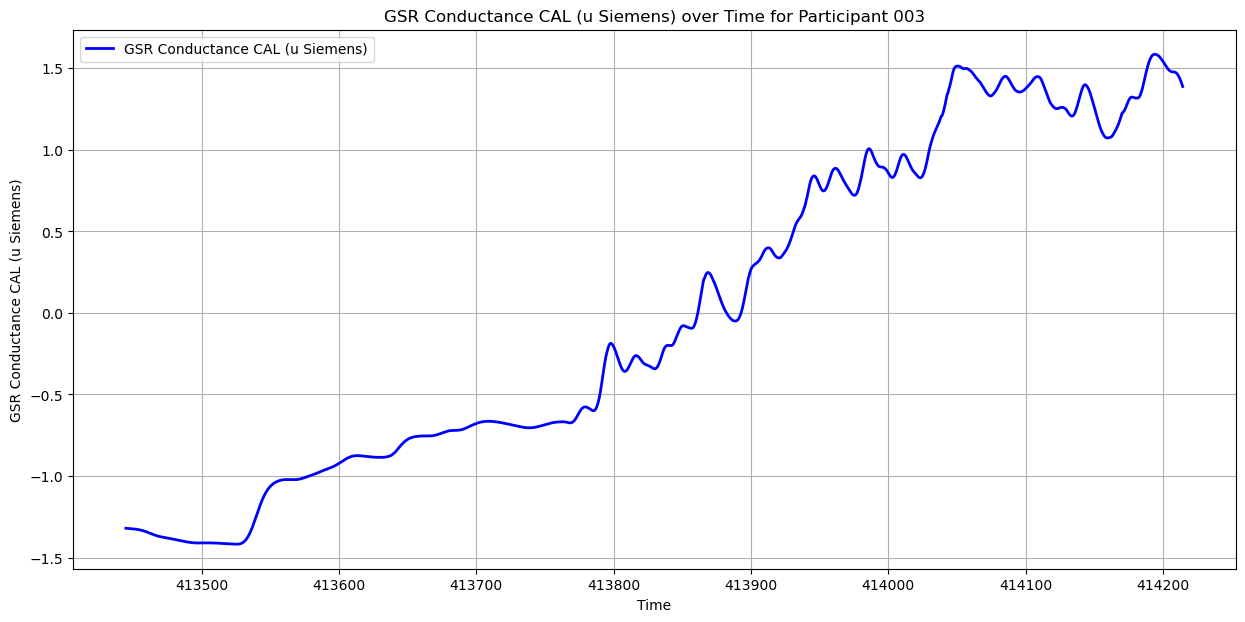

In [39]:
# normalize GSR data
normalized_GSR_data = {}
for participant_id in sensor_data.keys():
    normalized_GSR_data[participant_id] = normalize_data(sensor_data[participant_id], ["GSR CAL (kOhms)", "GSR Conductance CAL (u Siemens)"])

# Plot the normalized GSR data
for participant_id in normalized_GSR_data.keys():
    plot_gsr_data(normalized_GSR_data, participant_id, variable=GSR_labels[-1], window_size=100)

### NASA-TLX Data

In [40]:
TLX_results = {}

for participant_id in tlx_data.keys():
    TLX_results[f'Mental Demand {participant_id}'] = tlx_data[participant_id]['Mental Demand']
    TLX_results[f'Physical Demand {participant_id}'] = tlx_data[participant_id]['Physical Demand']
    TLX_results[f'Temporal Demand {participant_id}'] = tlx_data[participant_id]['Temporal Demand']
    TLX_results[f'Performance {participant_id}'] = tlx_data[participant_id]['Performance']
    TLX_results[f'Effort {participant_id}'] = tlx_data[participant_id]['Effort']
    TLX_results[f'Frustration {participant_id}'] = tlx_data[participant_id]['Frustration']

values = [float(TLX_results[f'Mental Demand {participant_id}']) for participant_id in tlx_data.keys()] 
mean = sum(values) / len(values)  
TLX_results['Mean Mental Demand'] = mean

values = [float(TLX_results[f'Physical Demand {participant_id}']) for participant_id in tlx_data.keys()]
mean = sum(values) / len(values)
TLX_results['Mean Physical Demand'] = mean

values = [float(TLX_results[f'Temporal Demand {participant_id}']) for participant_id in tlx_data.keys()]
mean = sum(values) / len(values)
TLX_results['Mean Temporal Demand'] = mean

values = [float(TLX_results[f'Performance {participant_id}']) for participant_id in tlx_data.keys()]
mean = sum(values) / len(values)
TLX_results['Mean Performance'] = mean

values = [float(TLX_results[f'Effort {participant_id}']) for participant_id in tlx_data.keys()]
mean = sum(values) / len(values)
TLX_results['Mean Effort'] = mean

values = [float(TLX_results[f'Frustration {participant_id}']) for participant_id in tlx_data.keys()]
mean = sum(values) / len(values)
TLX_results['Mean Frustration'] = mean

print(TLX_results)

{'Mental Demand 001': '25', 'Physical Demand 001': '5', 'Temporal Demand 001': '20', 'Performance 001': '25', 'Effort 001': '40', 'Frustration 001': '20', 'Mental Demand 002': '30', 'Physical Demand 002': '5', 'Temporal Demand 002': '40', 'Performance 002': '30', 'Effort 002': '30', 'Frustration 002': '30', 'Mental Demand 003': '20', 'Physical Demand 003': '0', 'Temporal Demand 003': '30', 'Performance 003': '15', 'Effort 003': '25', 'Frustration 003': '0', 'Mental Demand 004': '65', 'Physical Demand 004': '65', 'Temporal Demand 004': '10', 'Performance 004': '35', 'Effort 004': '65', 'Frustration 004': '60', 'Mean Mental Demand': 35.0, 'Mean Physical Demand': 18.75, 'Mean Temporal Demand': 25.0, 'Mean Performance': 26.25, 'Mean Effort': 40.0, 'Mean Frustration': 27.5}


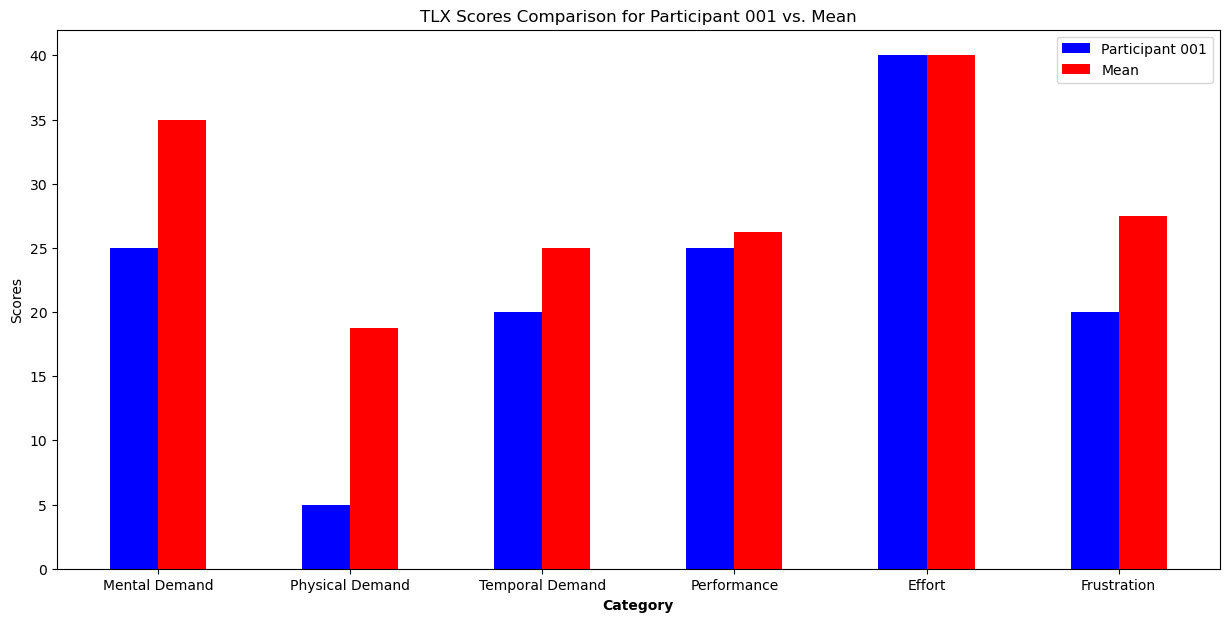

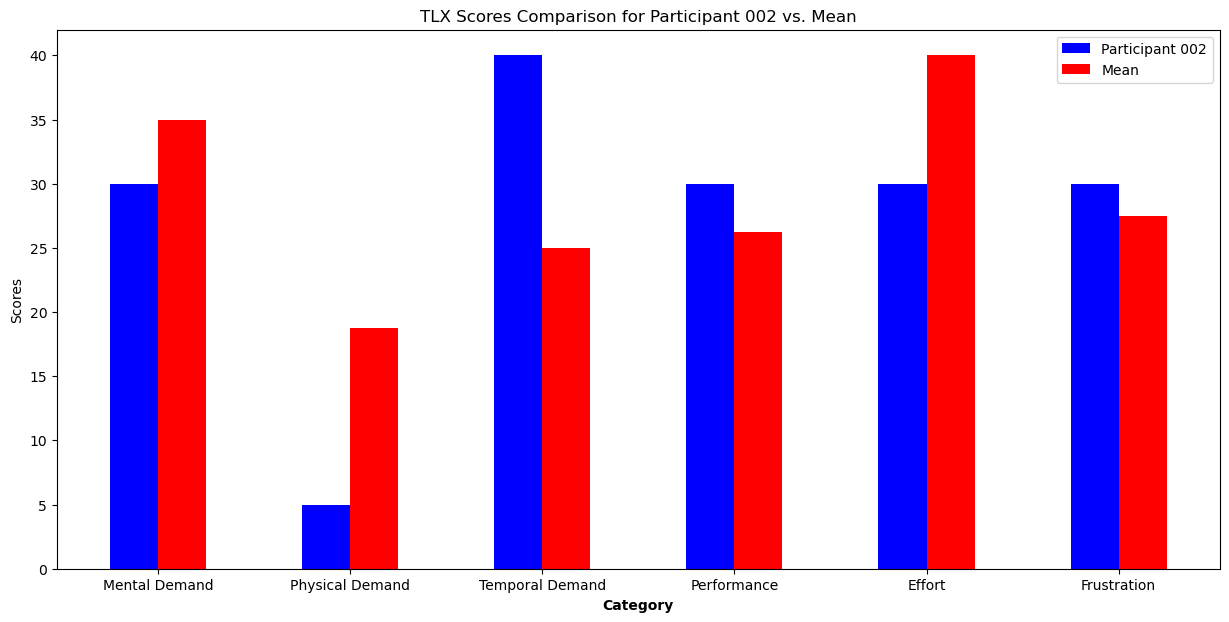

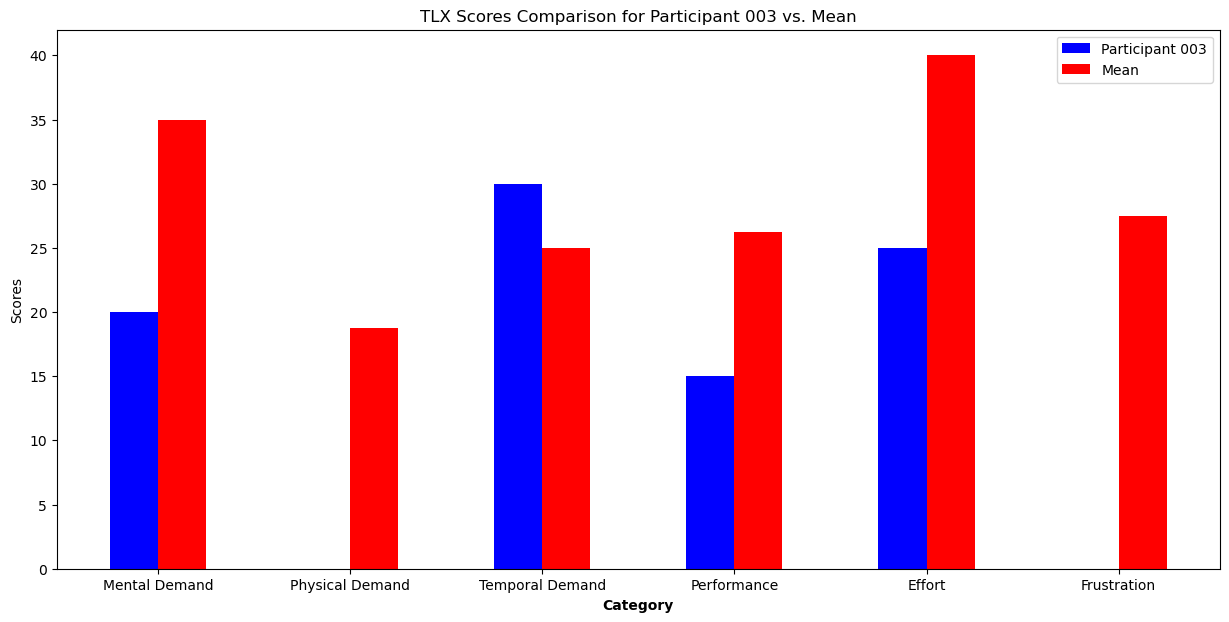

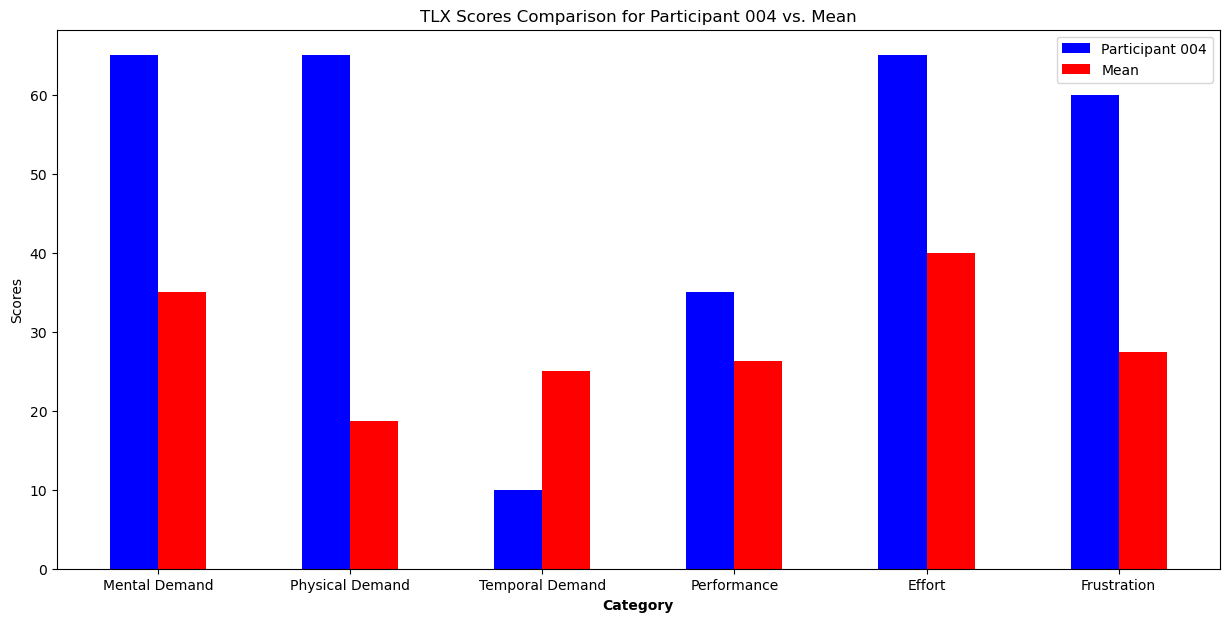

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming TLX_results is your data dictionary that includes both individual participant scores and mean scores

for participant_id in tlx_data.keys():
    plt.figure(figsize=(15, 7))
    
    # Individual participant scores
    mental = float(TLX_results[f'Mental Demand {participant_id}'])
    physical = float(TLX_results[f'Physical Demand {participant_id}'])
    temporal = float(TLX_results[f'Temporal Demand {participant_id}'])
    performance = float(TLX_results[f'Performance {participant_id}'])
    effort = float(TLX_results[f'Effort {participant_id}'])
    frustration = float(TLX_results[f'Frustration {participant_id}'])

    # Mean scores
    mean_mental = float(TLX_results['Mean Mental Demand'])
    mean_physical = float(TLX_results['Mean Physical Demand'])
    mean_temporal = float(TLX_results['Mean Temporal Demand'])
    mean_performance = float(TLX_results['Mean Performance'])
    mean_effort = float(TLX_results['Mean Effort'])
    mean_frustration = float(TLX_results['Mean Frustration'])

    labels = ['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration']
    participant_values = [mental, physical, temporal, performance, effort, frustration]
    mean_values = [mean_mental, mean_physical, mean_temporal, mean_performance, mean_effort, mean_frustration]

    # Set position of bar on X axis
    r1 = np.arange(len(labels))
    r2 = [x + 0.25 for x in r1]
    
    # Make the plot
    plt.bar(r1, participant_values, color='blue', width=0.25, label=f'Participant {participant_id}')
    plt.bar(r2, mean_values, color='red', width=0.25, label='Mean')
    
    # Add xticks on the middle of the group bars
    plt.xlabel('Category', fontweight='bold')
    plt.xticks([r + 0.125 for r in range(len(labels))], labels)
    plt.ylabel('Scores')
    plt.title(f'TLX Scores Comparison for Participant {participant_id} vs. Mean')
    
    # Create legend & Show graphic
    plt.legend()
    plt.show()
